# Random Forest Classifier

O objetivo é utilizar características biomecânicas de diferentes pacientes para classificar se eles são normais, se tem hérnia de disco ou se tem espondilolistese. O processo de classificação será feito utilizando Random Forest Classifier

Dataser obtido do Kaggle (https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients)

Este problema contêm dois datasets. O dataset biomechanical_3C.csv contêm dados das três classes e no dataset biomechanical_2C.csv, os pacientes com hérnia de disco ou espondilolisteste foram classificados como anormais.

Vamos utilizar o dataset com os dados das três classes

Importando bibliotecas usuais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('biomechanical_3C.csv')

In [3]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Verificando a existência de NaNs

In [5]:
dados.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Verificando a quantidade de elementos de cada classe

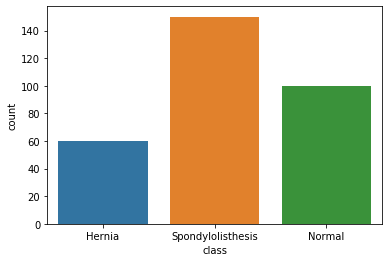

In [6]:
sns.countplot(x='class',data=dados)

In [7]:
dados['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

Observamos que apesar da amostra não estar balanceada, a diferença entre as classes não é muito grande

Analisamos todos os gráficos, observamos que haverá a necessidade de normalizarmos os dados

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
colunas = dados.columns.drop('class')

In [10]:
colunas

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [11]:
sc=StandardScaler()

In [12]:
dados[colunas] = sc.fit_transform(dados[colunas])

In [13]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,Hernia
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,Hernia
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,Hernia
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,Hernia
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,Hernia


Convertendo as classes para valores numéricos

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
enconder = LabelEncoder()

In [17]:
dados['class'] = enconder.fit_transform(dados['class'])

In [19]:
enconder.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [20]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0


Separando nas variáveis X e Y

In [21]:
X = dados.drop('class',axis=1).values

In [22]:
Y = dados['class'].values

Separando em amostra de treino e teste

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo de Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
modelo = RandomForestClassifier()

In [27]:
modelo.fit(X_treino,Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Determiando a acurácia na amostra de treino

In [28]:
score_treino = modelo.score(X_treino,Y_treino)

In [29]:
score_treino

1.0

Realizando previsão na amostra de teste

In [30]:
Y_previsto = modelo.predict(X_teste)

Gerando matriz de confusão

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [33]:
cm

array([[ 6,  8,  1],
       [ 4, 18,  2],
       [ 0,  2, 37]])

In [34]:
score_teste = modelo.score(X_teste,Y_teste)

In [35]:
score_teste

0.782051282051282

Aplicando GridSearchCV para determinar os melhores parâmetros do modelo

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parametros = {'n_estimators' : np.arange(80,120),
              'criterion' : ['gini','entropy'], 
              'max_depth' : np.arange(2,50),
              'min_samples_split' : np.arange(2,5),
              'max_features' : ['auto','sqrt','log2']}

In [38]:
melhor_modelo = GridSearchCV(modelo, parametros, n_jobs=-1, cv=2, refit=True)

In [39]:
melhor_modelo.fit(X_treino, Y_treino)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['aut

In [41]:
modelo_final = melhor_modelo.best_estimator_

In [42]:
modelo_final.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
Y_previsto = modelo_final.predict(X_teste)

In [44]:
cm=confusion_matrix(Y_teste,Y_previsto)
cm

array([[ 7,  7,  1],
       [ 3, 19,  2],
       [ 0,  0, 39]])

In [45]:
score_teste = modelo_final.score(X_teste,Y_teste)

In [46]:
score_teste

0.8333333333333334